In [ ]:
from dask.distributed import Client
import pandas as pd
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from dask.distributed import as_completed

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/thistleknot/Python-Stock/master/data/raw/states.csv")


In [ ]:
df_ = df.iloc[:,1:]
df_

In [ ]:
client = Client('192.168.3.100:8786')

In [ ]:
df=X[0]
lr = LinearRegression()

#df_ = pd.DataFrame(df)
#print(df_)
variables=df.columns
target = variables[0]

temp = pd.concat([pd.DataFrame(df[target]),df.loc[:, ~df.columns.isin([target])]],axis=1)

temp
#print(temp)

s_f_s = sfs(lr, 
          k_features=len(df.columns)-1, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          n_jobs=-1,
          cv=10)

s_f_s_f = s_f_s.fit(temp.loc[:, ~temp.columns.isin([target])], pd.DataFrame(temp[target]))

s_f_s_f.get_metric_dict()

In [ ]:
def y_subset(df):
    
    X = list ()
    
    for var_pos in range(0,len(df.columns)):
        variables=df.columns
        target=variables[var_pos]
        #print(target)
        #print(variables.isin([target]))
        temp = pd.concat([pd.DataFrame(df[target]),df_.loc[:, ~df.columns.isin([target])]],axis=1)
        #print(temp)
        X.append(temp)
    return(X)

def regress (df):
    
    df=X[0]
    lr = LinearRegression()
    
    #df_ = pd.DataFrame(df)
    #print(df_)
    variables=df.columns
    target = variables[0]
    
    temp = pd.concat([pd.DataFrame(df[target]),df.loc[:, ~df.columns.isin([target])]],axis=1)

    temp
    #print(temp)
    
    s_f_s = sfs(lr, 
              k_features=len(df.columns)-1, 
              forward=True, 
              floating=False, 
              scoring='neg_mean_squared_error',
              n_jobs=-1,
              cv=10)
    #s_f_s

    s_f_s_f = s_f_s.fit(temp.loc[:, ~temp.columns.isin([target])], pd.DataFrame(temp[target]))
    #return(s_f_s_f)
    fig = plot_sfs(s_f_s_f.get_metric_dict(), kind='std_err')
    plt.title('Sequential Forward Selection (w. StdErr)')
    plt.grid()
    #plt.show()
    name = str(target)+'.csv'
    print(name)
    
    plt.savefig(str(target)+'.png', dpi=300, format='png', bbox_inches='tight')
    
    temp.to_csv(name)
    return(s_f_s_f.get_metric_dict())

In [ ]:
pwd

In [ ]:
X = y_subset(df_)

future = client.map(regress, X)

best = -1
for f in as_completed(future):
   print(f.result())

0
Poverty.csv
{1: {'feature_idx': (7,), 'cv_scores': array([-3.15274491, -1.26407709, -1.75937342, -3.12120296, -5.43122039,
       -2.42430535, -2.94517312, -0.45361923, -3.65321365, -3.07595086]), 'avg_score': -2.728088096128981, 'feature_names': ('Income',), 'ci_bound': 0.968749900866872, 'std_dev': 1.304339583701289, 'std_err': 0.434779861233763}, 2: {'feature_idx': (6, 7), 'cv_scores': array([-1.74222868, -0.95480986, -1.61218206, -3.09318719, -3.93925243,
       -1.06538853, -2.81517363, -1.60658208, -2.33782725, -1.69314775]), 'avg_score': -2.0859779451219502, 'feature_names': ('Unemployed', 'Income'), 'ci_bound': 0.6681187960580937, 'std_dev': 0.899565297022082, 'std_err': 0.2998550990073607}, 3: {'feature_idx': (1, 6, 7), 'cv_scores': array([-1.88498205, -1.59715093, -2.68692908, -1.28388441, -2.04201156,
       -0.67598843, -2.23126793, -0.8114806 , -1.70255191, -1.12988321]), 'avg_score': -1.6046130123518492, 'feature_names': ('White', 'Unemployed', 'Income'), 'ci_bound': 0.

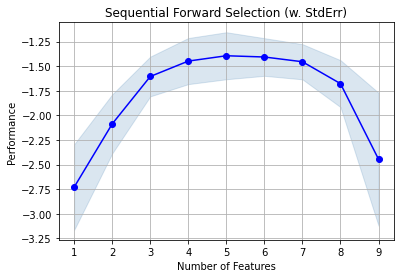

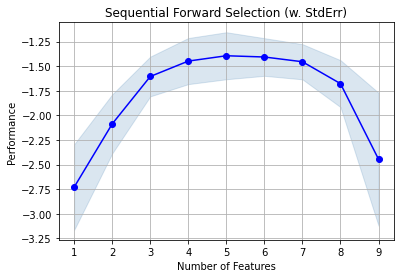

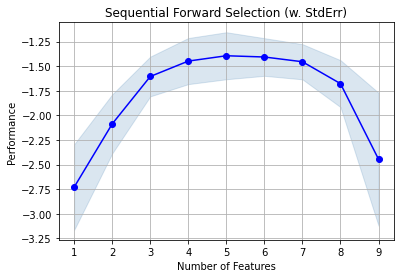

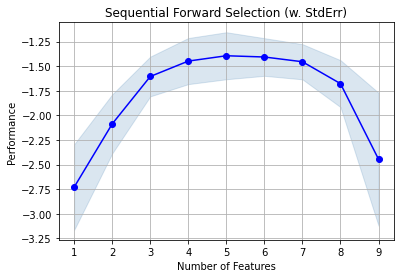

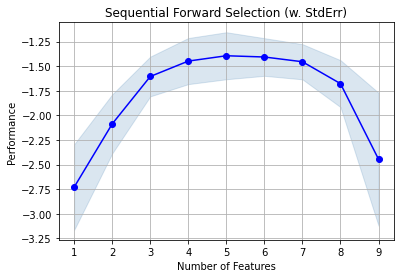

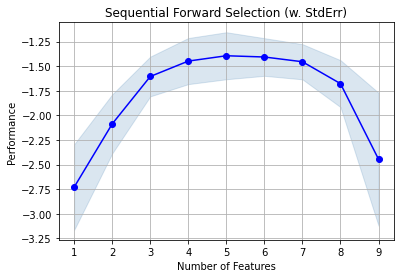

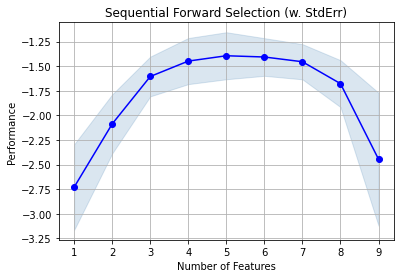

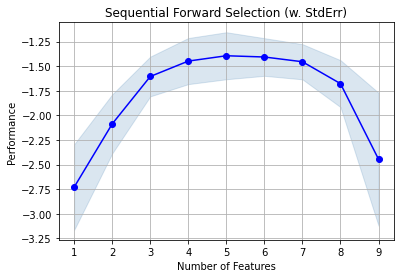

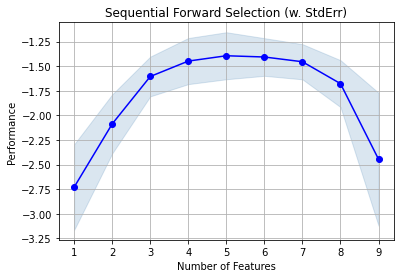

In [80]:

#manual
for i in (range(0,(len(X)-1))):
    print(i)
    print(regress(X[i]))
    
